<a href="https://colab.research.google.com/github/rsaran-BioAI/AGILE/blob/main/FashionMNIST_VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import torch
from torchvision import datasets, transforms
import helper
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor

In [4]:
# Define a transform to normalize the data
#transform = transforms.Compose([transforms.ToTensor(),
                                #transforms.Lambda(lambda x: x.repeat(3,1,1)),
                                #transforms.Normalize((0.5,), (0.5,))])

In [17]:
# Download and load the training data
trainset = datasets.FashionMNIST('/content/drive/MyDrive/F_MNIST_data', download=True, train=True, transform=ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [18]:
print(trainset)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/F_MNIST_data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [20]:
# Download and load the test data
testset = datasets.FashionMNIST('/content/drive/MyDrive/F_MNIST_data/', download=True, train=False, transform=ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [21]:
print(testset)


Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/F_MNIST_data/
    Split: Test
    StandardTransform
Transform: ToTensor()


In [22]:
import matplotlib.pyplot as plt

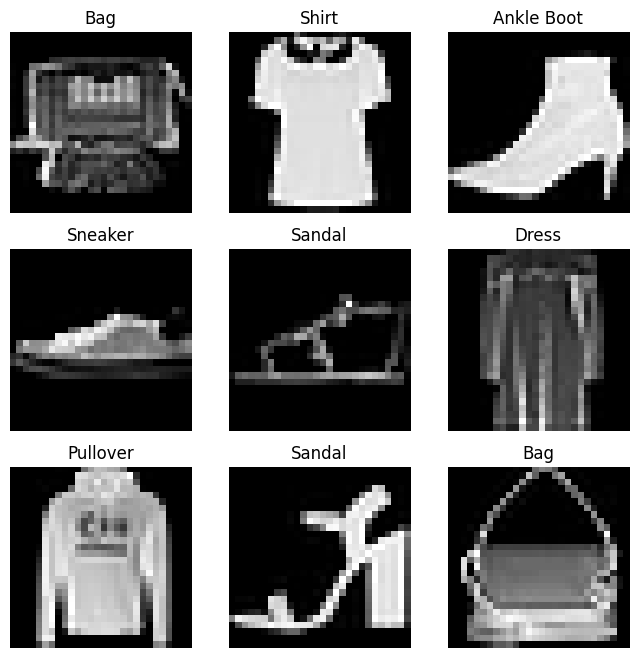

In [25]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Creating a Custom Dataset for your files

In [26]:
import os
import pandas as pd
from torchvision.io import read_image

In [29]:
class CustomImageDataset(Dataset):
    # The __init__ function is run once when instantiating the Dataset object. We initialize the directory containing the images, the annotations file, and both transforms
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    # The __len__ function returns the number of samples in our dataset.
    def __len__(self):
        return len(self.img_labels)

    # The __getitem__ function loads and returns a sample from the dataset at the given index idx.
    #Based on the index, it identifies the image’s location on disk, converts that to a tensor using read_image...
    # ...retrieves the corresponding label from the csv data in self.img_labels, calls the transform functions on them (if applicable)...
    # ...and returns the tensor image and corresponding label in a tuple.
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label